In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sb

In [2]:
data = pd.read_csv('sleep_params.csv')

In [3]:
data.head()

,sr,rr,t,lm,bo,rem,sr.1,hr,sl
0,93.80,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.64,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.00,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.76,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.12,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0


In [4]:
data.shape

(630, 9)

Rename columns

In [5]:
data.columns=['snoring_rate', 'respiration_rate', 'body_temperature', 'limb_movement', 'blood_oxygen', \
             'eye_movement', 'sleeping_hours', 'heart_rate', 'stress_level']
data.head()

,snoring_rate,respiration_rate,body_temperature,limb_movement,blood_oxygen,eye_movement,sleeping_hours,heart_rate,stress_level
0,93.80,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.64,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.00,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.76,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.12,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0


Check for null var

In [6]:
data.isnull().any()

snoring_rate        False
respiration_rate    False
body_temperature    False
limb_movement       False
blood_oxygen        False
eye_movement        False
sleeping_hours      False
heart_rate          False
stress_level        False
dtype: bool

Data split

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test=train_test_split(data.drop(['stress_level'],axis = 1), data['stress_level'], \
                                                  test_size=0.3, random_state=8)
X_train.shape, X_test.shape

((441, 8), (189, 8))

Converting labels to binary matrices

In [9]:
from tensorflow.keras.utils import to_categorical

In [10]:
num_classes=5
y_train=to_categorical(y_train, num_classes)
y_test=to_categorical(y_test, num_classes)
y_train[:5]

array([[0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]], dtype=float32)

Perceptron model with ReLU activation

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [12]:
model=Sequential()
model.add(Dense(100, activation="relu"))
model.add(Dense(100, activation="relu"))
model.add(Dense(5, "softmax"))

In [13]:
epochs=50
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
stats=model.fit(X_train, y_train, epochs=epochs, validation_split=0.2)

Epoch 1/50
11/11 [==============================] - 1s 23ms/step - loss: 12.2959 - accuracy: 0.2358 - val_loss: 7.2007 - val_accuracy: 0.2584
Epoch 2/50
11/11 [==============================] - 0s 4ms/step - loss: 3.9256 - accuracy: 0.4119 - val_loss: 1.1026 - val_accuracy: 0.4719
Epoch 3/50
11/11 [==============================] - 0s 4ms/step - loss: 1.2710 - accuracy: 0.4375 - val_loss: 1.1984 - val_accuracy: 0.4382
Epoch 4/50
11/11 [==============================] - 0s 4ms/step - loss: 0.7798 - accuracy: 0.6392 - val_loss: 0.6580 - val_accuracy: 0.7079
Epoch 5/50
11/11 [==============================] - 0s 4ms/step - loss: 0.5538 - accuracy: 0.8409 - val_loss: 0.4757 - val_accuracy: 0.8989
Epoch 6/50
11/11 [==============================] - 0s 4ms/step - loss: 0.4282 - accuracy: 0.9062 - val_loss: 0.4182 - val_accuracy: 0.9438
Epoch 7/50
11/11 [==============================] - 0s 4ms/step - loss: 0.3740 - accuracy: 0.9432 - val_loss: 0.3424 - val_accuracy: 0.9326
Epoch 8/50
11/11 [

Visualizing Training Results

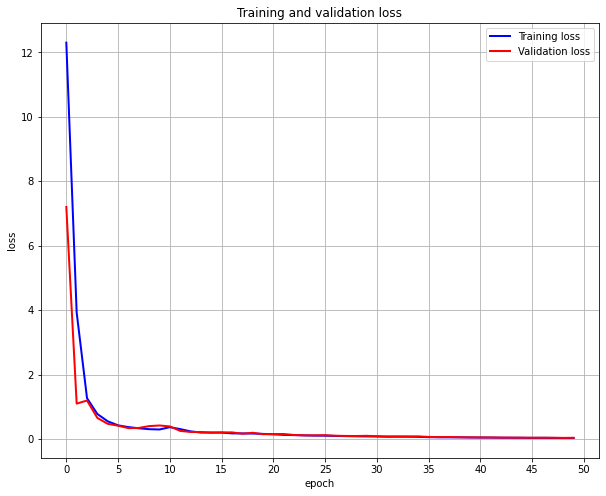

In [14]:
stats_df=pd.DataFrame(stats.history)
stats_df['epoch']=list(range(epochs))
plot.figure(figsize=(10, 8))
sb.lineplot(y='loss', x='epoch', data=stats_df, color='blue', linewidth=2, label="Training loss")
sb.lineplot(y='val_loss', x='epoch', data=stats_df, color='red', linewidth=2, label="Validation loss")
plot.grid()
plot.legend()
plot.title("Training and validation loss")
plot.xticks(range(0, 51, 5));

Training and validation loss curve converged around the 25th epoch, this model has the best fit on this dataset.

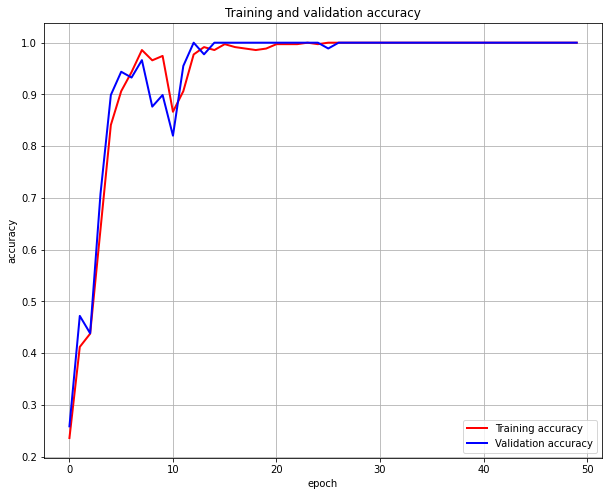

In [15]:
stats_df=pd.DataFrame(stats.history)
stats_df['epoch']=list(range(epochs))
plot.figure(figsize=(10, 8))
sb.lineplot(y='accuracy', x='epoch', data=stats_df, color='red', linewidth=2, label="Training accuracy")
sb.lineplot(y='val_accuracy', x='epoch', data=stats_df, color='blue', linewidth=2, \
            label="Validation accuracy")
plot.grid()
plot.legend()
plot.title("Training and validation accuracy")
plot.xticks(range(0, 51, 10));

Testing on Test set

In [16]:
accuracy=model.evaluate(X_test,y_test)

6/6 [==============================] - 0s 2ms/step - loss: 0.0355 - accuracy: 1.0000


The model has an accuracy of 100% on the test set